# ANÁLISIS BIVARIANTE

El análisis bivariante se utiliza para examinar la relación o asociación entre dos variables en un conjunto de datos.

El análisis bivariante puede ser útil para:

1. Identificar correlaciones: El análisis bivariante permite determinar si existe una relación entre dos variables y si esa relación es positiva, negativa o no existe. Esto puede ayudar a comprender cómo una variable afecta a la otra y a identificar patrones o tendencias.

2. Realizar pruebas de hipótesis: El análisis bivariante puede usarse para evaluar si hay diferencias significativas entre dos grupos o categorías en función de una variable. Esto puede ayudar a determinar si una variable tiene un impacto estadísticamente significativo en otra variable.

3. Visualizar la relación: El análisis bivariante a menudo se representa mediante gráficos, como gráficos de dispersión, diagramas de cajas y bigotes, o gráficos de barras. Estos gráficos permiten visualizar la relación entre las dos variables y pueden revelar patrones o tendencias visuales.

4. Predecir valores: El análisis bivariante puede ayudar a predecir valores de una variable en función de otra variable. 

## 1. Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar
import locale

import warnings
# Suprimir los warnings
warnings.filterwarnings('ignore')

## 2. Cargar datos

In [3]:
ruta = '../data/calidad_aire_clean_outliers.csv'
df = pd.read_csv(ruta, sep=',')
df.head(2)

,FECHA,ANO,MES,DIA,HORA,DIA_SEMANA,ESTACION,SO2,CO,NO2,...,PM10,O3,BTX,TEMPERATURA,HUMEDAD,ICA_SO2,ICA_PM10,ICA_O3,ICA_NO2,ICA
0,2019-01-01 05:00:00,2019.0,1.0,1.0,5,Martes,8.0,10.0,0.4,50.0,...,19.0,11.88,2.6,4.7,50.0,8.0,38.0,9.90,125.0,45.22
1,2019-01-01 06:00:00,2019.0,1.0,1.0,6,Martes,8.0,8.0,0.4,55.0,...,16.0,7.97,2.2,3.2,55.0,6.4,32.0,6.64,137.5,45.64


In [4]:
df['ANO'] = df['ANO'].astype(int)
df['MES'] = df['MES'].astype(int)
df['DIA'] = df['DIA'].astype(int)
df['HORA'] = df['HORA'].astype(int)

## 3. Análisis Bivariante

En este apartado se analizará la variación del ICA, según los siguientes criterios:

* Por Estaciones del Año (Primavera, Verano, Otoño, Invierno)
* Por Distribución Horaria (Punta, Valle, LLana)
* Por Tipo de Día (Laborable, Festivo, Vispera Festivo)

#### 3.1 Gráficos de Dispersión

* Analizar la relación de ICA con el resto de contaminantes atmósfericos y con los datos metereológicos

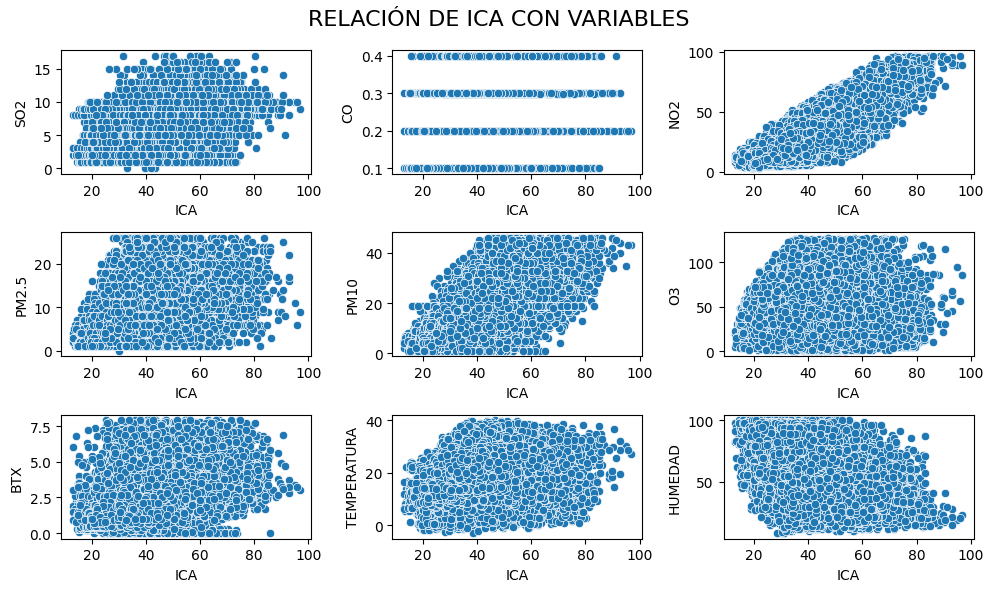

In [5]:
selected_columns = ['SO2', 'CO', 'NO2', 'PM2.5', 'PM10', 'O3', 'BTX', 'TEMPERATURA', 'HUMEDAD']

num_plots = len(selected_columns)
num_cols = 3
num_rows = (num_plots + 1) // num_cols  # División entera redondeada hacia arriba

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 6))

for i, column in enumerate(selected_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.scatterplot(data=df, x=df['ICA'], y=column, ax=ax)

    ax.set_xlabel('ICA')
    ax.set_ylabel(column)

    
# Eliminar subparcelas vacías si es necesario
if num_plots % num_cols != 0:
    fig.delaxes(axes[-1, -1])

# Agregar título general a la figura
plt.suptitle('RELACIÓN DE ICA CON VARIABLES', fontsize=16)

# Ajustar el espacio entre el título general y los subplots
plt.subplots_adjust(top=1)

plt.tight_layout()
plt.show()

#### 3.2 Gráficos de Barras

##### 3.2.1 ICA por Año

Text(0.5, 1.0, 'Evolución de la  Calidad del aire por AÑO')

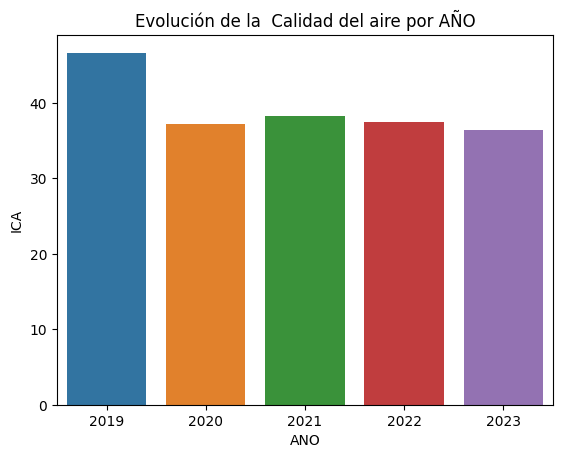

In [6]:
df_ica_ano = df.groupby('ANO')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_ica_ano, x='ANO', y='ICA')
plt.title('Evolución de la  Calidad del aire por AÑO' )

 ##### 3.2.2 ICA por Estación del Año

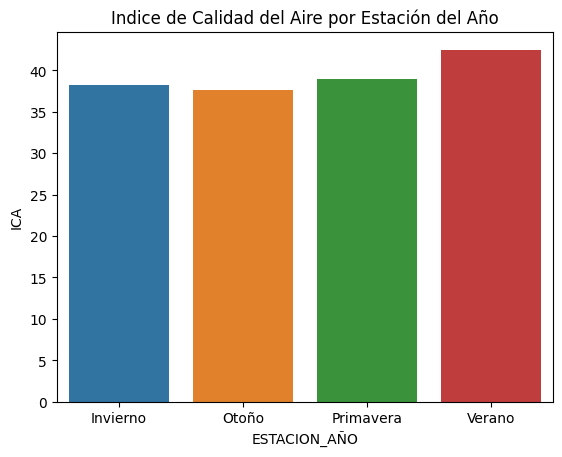

In [7]:
# Crear columna 'ESTACION' para agrupar meses en estaciones
df['ESTACION_AÑO'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

df_est_año = df.groupby('ESTACION_AÑO')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_est_año, x='ESTACION_AÑO', y='ICA')

plt.title('Indice de Calidad del Aire por Estación del Año')
plt.show()

 ##### 3.2.3. ICA por Día Semana (Laborable, Festivo, Víspera Festivo)

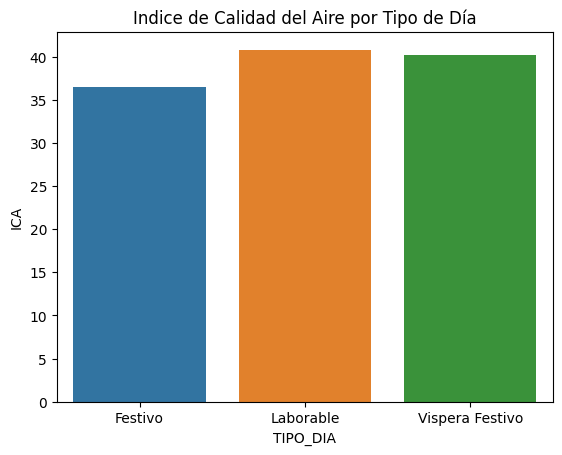

In [8]:
# Crear columna 'ESTACION' para agrupar meses en estaciones
df['TIPO_DIA'] = df['DIA_SEMANA'].apply(lambda x: 'Laborable' if x in ['Martes', 'Miercoles', 'Jueves'] else 'Vispera Festivo' if x in ['Lunes', 'Viernes'] else 'Festivo')

df_tipo_dia = df.groupby('TIPO_DIA')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_tipo_dia, x='TIPO_DIA', y='ICA')

plt.title('Indice de Calidad del Aire por Tipo de Día')
plt.show()

 ##### 3.2.4. ICA por Tramo Horario (Valle, Llana, Plano)

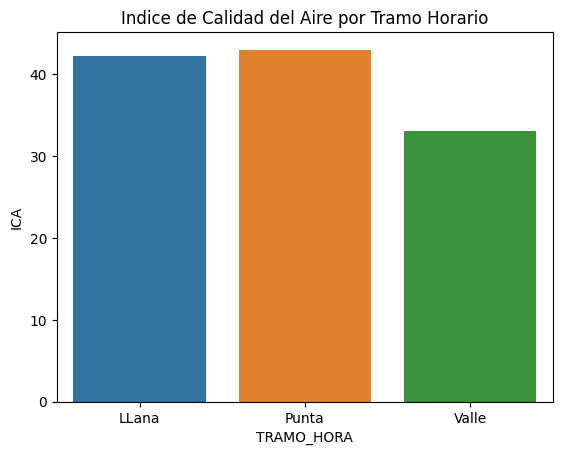

In [9]:
# Crear columna 'TIPO_HORA' para agrupar horas en valle y punta
df['TRAMO_HORA'] = df['HORA'].apply(lambda x: 'Punta' if 8 <= x <= 20 else 'LLana' if 21 <= x <= 24 else 'Valle')

df_tramo_hora = df.groupby('TRAMO_HORA')['ICA'].mean().reset_index()
ax = sns.barplot(data=df_tramo_hora, x='TRAMO_HORA', y='ICA')

plt.title('Indice de Calidad del Aire por Tramo Horario')
plt.show()


#### 3.3 Gráficos de Barras Agrupadas

##### 3.3.1 Gráficos de Barras por Año y Estación del Año

Diferenciar el índice de calidad del aire (ICA) en cada año y para cada estación del año. 
Cada barra representará un año y estará dividida en secciones para cada estación del año.

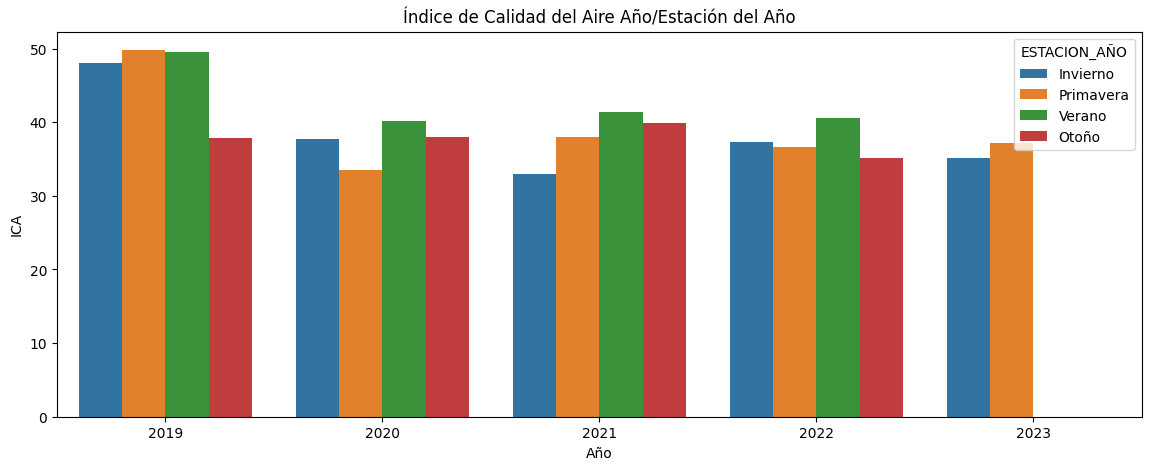

In [10]:
# Crear una nueva columna 'ESTACION' para agrupar meses en estaciones
df['ESTACION_AÑO'] = df['MES'].apply(lambda x: 'Invierno' if x in [12, 1, 2] else 'Primavera' if x in [3, 4, 5] else 'Verano' if x in [6, 7, 8] else 'Otoño')

# Ajustar el tamaño de la figura
plt.figure(figsize=(14, 5))

# Graficar el gráfico de barras agrupadas
sns.barplot(data=df, x='ANO', y='ICA', hue='ESTACION_AÑO', errorbar=None)

# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire Año/Estación del Año')
plt.xlabel('Año')
plt.ylabel('ICA')

# Configurar las etiquetas del eje x como números enteros
#plt.xticks(df['ANO'].unique().astype(int))

# Mostrar el gráfico
plt.show()

##### 3.3.2 Gráficos de Barras por Año y Mes

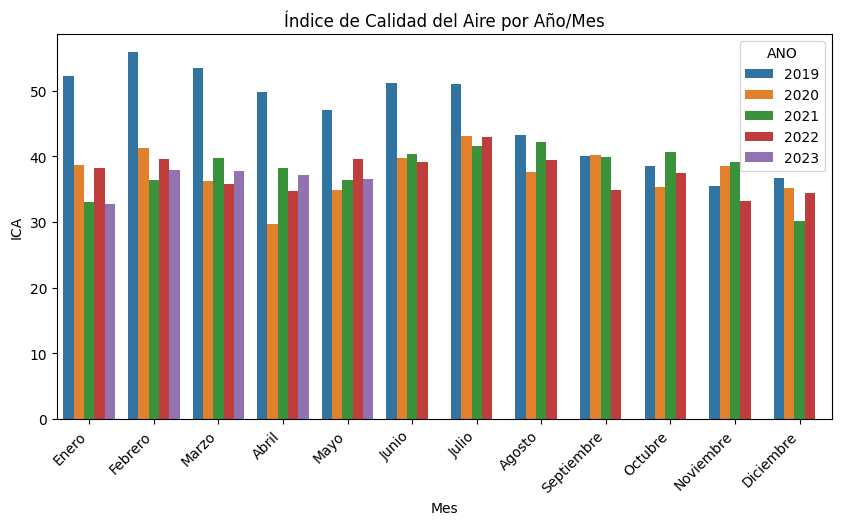

In [11]:
# Establecer la configuración regional en español
locale.setlocale(locale.LC_ALL, 'es_ES')

# Obtener los nombres de los meses en español
nombres_meses = [calendar.month_name[i].capitalize() for i in range(1, 13)]

# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 5))

# Graficar el gráfico de barras agrupadas
sns.barplot(data=df, x='MES', y='ICA', hue='ANO', errorbar=None)

# Configurar los nombres de los meses en el eje x
plt.xticks(ticks=range(12), labels=nombres_meses, rotation=45, ha='right')

# Agregar título y etiquetas de los ejes
plt.title('Índice de Calidad del Aire por Año/Mes')
plt.xlabel('Mes')
plt.ylabel('ICA')

# Mostrar el gráfico
plt.show()
